<a href="https://colab.research.google.com/github/assaabriiii/AI/blob/main/Choose_Best_Learning_Rate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt

In [ ]:
X, y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)
X = X / 255.0
y = y.astype(int)

In [ ]:
images = X.reshape(-1, 28, 28)

def extract_4x4_features(img):

    feats = []
    for i in range(0, 28, 4):
        for j in range(0, 28, 4):
            patch = img[i:i+4, j:j+4]
            feats.append(patch.mean())
    return np.array(feats)

In [ ]:
X_features = np.array([extract_4x4_features(img) for img in images])
print("New shape:", X_features.shape)

New shape: (70000, 49)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X_features, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
HIDDEN = 10

print("OPTION A: Fixed learning rates")
print("-" * 42)
fixed_results = []

for lr in [0.01, 0.001]:
    mlp = MLPClassifier(
        hidden_layer_sizes=(HIDDEN,),
        activation='relu',
        learning_rate='constant',
        learning_rate_init=lr,
        max_iter=200,
        batch_size=64,
        random_state=42,
        verbose=False
    )
    mlp.fit(X_train, y_train)
    test_acc = mlp.score(X_test, y_test)
    fixed_results.append((lr, test_acc, mlp.n_iter_))
    print(f"lr = {lr:<6} → Test acc: {test_acc:.4f} (epochs: {mlp.n_iter_})")

print("\nOPTION B: Decay 0.1 → 0.01 → 0.001")
print("-" * 42)

mlp_decay = MLPClassifier(
    hidden_layer_sizes=(HIDDEN,),
    activation='relu',
    learning_rate='adaptive',
    learning_rate_init=0.1,
    max_iter=200,
    batch_size=64,
    random_state=42,
    verbose=False
)

mlp_decay.fit(X_train, y_train)
final_lr = mlp_decay.learning_rate_init
test_acc_decay = mlp_decay.score(X_test, y_test)
epochs_decay = mlp_decay.n_iter_

print(f"Started at 0.1 → ended at {final_lr}")
print(f"Test accuracy: {test_acc_decay:.4f} (epochs: {epochs_decay})")

# ——— FINAL CHOICE ———
best_fixed_lr = max(fixed_results, key=lambda x: x[1])[0]
print("\n" + "="*55)

OPTION A: Fixed learning rates
------------------------------------------
lr = 0.01   → Test acc: 0.9093 (epochs: 96)


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


lr = 0.001  → Test acc: 0.9066 (epochs: 200)

OPTION B: Decay 0.1 → 0.01 → 0.001
------------------------------------------
Started at 0.1 → ended at 0.1
Test accuracy: 0.8684 (epochs: 22)



/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


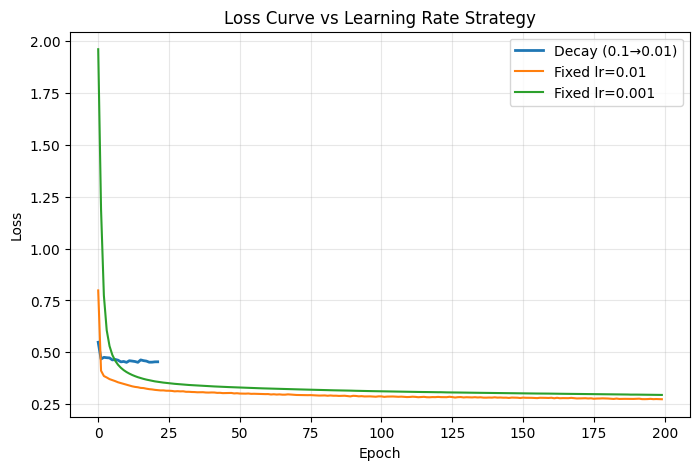

In [16]:
plt.figure(figsize=(8,5))
plt.plot(mlp_decay.loss_curve_, label='Decay (0.1→0.01)', linewidth=2)
for lr, _, _ in fixed_results:
    mlp_temp = MLPClassifier(hidden_layer_sizes=(HIDDEN,), learning_rate_init=lr,
                             learning_rate='constant', max_iter=200, random_state=42)
    mlp_temp.fit(X_train, y_train)
    plt.plot(mlp_temp.loss_curve_, label=f'Fixed lr={lr}')
plt.title('Loss Curve vs Learning Rate Strategy')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [ ]:
best_fixed_lr = max(fixed_results, key=lambda x: x[1])[0]
print("\n" + "="*55)